In [20]:
## Import the 

In [39]:
# import library
import pandas as pd
import numpy as np

# import mean train data set using pd
men_data = pd.read_csv('mens_train_file.csv', low_memory=False)

# import womean train data set using pd
women_data = pd.read_csv('womens_train_file.csv', low_memory=False)

# append gender
men_data['gender'] = 'mens'
women_data['gender'] = 'womens'

# verify the shapes
print(men_data.shape)
print(women_data.shape)

(5000, 27)
(5000, 27)


In [40]:
df = pd.concat([men_data, women_data])

In [41]:
df.shape

(10000, 27)

In [42]:
df.head()

,id,outcome,serve,rally,hitpoint,speed,net.clearance,distance.from.sideline,depth,outside.sideline,...,previous.net.clearance,previous.distance.from.sideline,previous.depth,opponent.depth,opponent.distance.from.center,same.side,previous.hitpoint,previous.time.to.net,server.is.impact.player,gender
0,5718,UE,1,4,B,35.52,-0.02,3.47,6.80,0,...,1.35,2.45,0.71,12.56,2.07,1,F,0.45,0,mens
1,371,FE,2,4,B,33.38,1.11,2.54,2.61,0,...,0.76,0.58,3.86,12.35,5.11,0,B,0.43,0,mens
2,7948,FE,1,23,B,22.32,-0.25,3.53,9.44,0,...,0.38,1.12,2.91,13.86,1.66,0,F,0.40,1,mens
3,9312,UE,1,9,F,36.84,0.77,0.59,3.34,1,...,1.24,3.26,0.56,14.26,0.16,1,B,0.67,1,mens
4,7667,W,1,4,B,35.54,0.12,0.92,5.50,0,...,0.17,1.43,3.95,11.37,1.11,0,F,0.34,0,mens


In [43]:
print(df.hitpoint.unique())
print(df['previous.hitpoint'].unique())

['B' 'F' 'U' 'V']
['F' 'B' 'V' 'U']


In [44]:
df['previous.hitpoint'] = df['previous.hitpoint'].replace(['U'], '0')
df['previous.hitpoint'] = df['previous.hitpoint'].replace(['F'], '1')
df['previous.hitpoint'] = df['previous.hitpoint'].replace(['B'], '2')
df['previous.hitpoint'] = df['previous.hitpoint'].replace(['V'], '3')

df['hitpoint'] = df['hitpoint'].replace(['U'], '0')
df['hitpoint'] = df['hitpoint'].replace(['F'], '1')
df['hitpoint'] = df['hitpoint'].replace(['B'], '2')
df['hitpoint'] = df['hitpoint'].replace(['V'], '3')

df['gender'] = df['gender'].replace(['mens'], '0')
df['gender'] = df['gender'].replace(['womens'], '1')

df['previous.hitpoint'] = df['previous.hitpoint'].astype('category').cat.codes
df['hitpoint'] = df['hitpoint'].astype('category').cat.codes
df['gender'] = df['gender'].astype('category').cat.codes

In [45]:
df.dtypes

id                                      int64
outcome                                object
serve                                   int64
rally                                   int64
hitpoint                                 int8
speed                                 float64
net.clearance                         float64
distance.from.sideline                float64
depth                                 float64
outside.sideline                        int64
outside.baseline                        int64
player.distance.travelled             float64
player.impact.depth                   float64
player.impact.distance.from.center    float64
player.depth                          float64
player.distance.from.center           float64
previous.speed                        float64
previous.net.clearance                float64
previous.distance.from.sideline       float64
previous.depth                        float64
opponent.depth                        float64
opponent.distance.from.center     

In [46]:
# import library
from sklearn.model_selection import train_test_split

# adding a seed called random_state in train_test_split so that split is reproducible
random_state = 1

# X matrix (features / independent variables)
X = df.drop(['outcome', 'id'], axis=1)

# y matrix (target / dependent variable) will be: T_degC
y = df['outcome']

# build out the following: X_train, X_test, y_train, y_test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=random_state)

## Create the Model

In [47]:
# import library
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# setting n_jobs=-1 selects all physical cores and maximises its use
base_model_rnd_clf = RandomForestClassifier(n_jobs = -1, n_estimators = 500, 
                                            max_depth = 10, 
                                            max_features = 'log2',
                                            random_state=0)


base_model_rnd_clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=10, max_features='log2', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [48]:
# predict probabilities
y_pred_proba_base_model_test = base_model_rnd_clf.predict_proba(X_test)

# predict classes
y_pred_base_model_test = base_model_rnd_clf.predict(X_test)

print('First 5 predicted probabilities:\n', y_pred_proba_base_model_test[0:5])
print('\nFirst 5 predictions:\n',y_pred_base_model_test[0:5])

First 5 predicted probabilities:
 [[0.77433166 0.1786196  0.04704874]
 [0.39519916 0.35341562 0.25138522]
 [0.08371657 0.21832833 0.6979551 ]
 [0.05740873 0.1635805  0.77901077]
 [0.71931145 0.18099716 0.09969139]]

First 5 predictions:
 ['FE' 'FE' 'W' 'W' 'FE']


## Check out the model generalization with test data

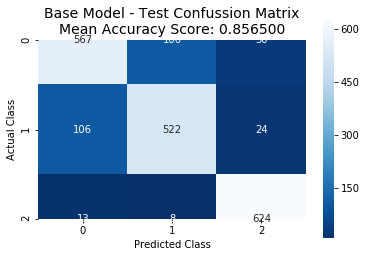

In [49]:
# import library
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

# mean error evaluation using the .score() method
base_model_rdn_clf_score_test = base_model_rnd_clf.score(X_test, y_test)

base_model_rdn_clf_confusion_matrix_test = metrics.confusion_matrix(y_test, y_pred_base_model_test)

df_cm = pd.DataFrame(base_model_rdn_clf_confusion_matrix_test, range(3), range(3))

sns.heatmap (df_cm, fmt='d',
             cmap='Blues_r', annot=True, square = True)

plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')

base_model_test_title = 'Base Model - Test Confussion Matrix\nMean Accuracy Score: {0:2f}'.format(base_model_rdn_clf_score_test)
plt.title(base_model_test_title, size = 14)
plt.show;

In [32]:
# import library
from sklearn.metrics import classification_report

base_model_rnd_clf_classification_report_test = classification_report(y_test, y_pred_base_model_test)
print(base_model_rnd_clf_classification_report_test)

              precision    recall  f1-score   support

          FE       0.83      0.81      0.82       703
          UE       0.82      0.80      0.81       652
           W       0.92      0.97      0.94       645

    accuracy                           0.86      2000
   macro avg       0.86      0.86      0.86      2000
weighted avg       0.85      0.86      0.86      2000



## See how the model overfits on train

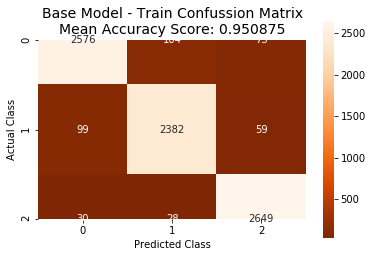

In [33]:
# import library
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

# predict classes
y_pred_base_model_train = base_model_rnd_clf.predict(X_train)

# mean error evaluation using the .score() method
base_model_rdn_clf_score_train = base_model_rnd_clf.score(X_train, y_train)

base_model_rdn_clf_confusion_matrix_train = metrics.confusion_matrix(y_train, y_pred_base_model_train)

df_cm = pd.DataFrame(base_model_rdn_clf_confusion_matrix_train, range(3), range(3))

sns.heatmap (df_cm, fmt='d',
             cmap='Oranges_r', annot=True, square = True)

plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')

base_model_train_title = 'Base Model - Train Confussion Matrix\nMean Accuracy Score: {0:2f}'.format(base_model_rdn_clf_score_train)
plt.title(base_model_train_title, size = 14)
plt.show;

In [34]:
# import library
from sklearn.metrics import classification_report

base_model_rnd_clf_classification_report_train = classification_report(y_train, y_pred_base_model_train)
print(base_model_rnd_clf_classification_report_train)

              precision    recall  f1-score   support

          FE       0.95      0.94      0.94      2753
          UE       0.95      0.94      0.94      2540
           W       0.95      0.98      0.97      2707

    accuracy                           0.95      8000
   macro avg       0.95      0.95      0.95      8000
weighted avg       0.95      0.95      0.95      8000



## Gradient Boost Classifier

In [35]:
from sklearn.ensemble import GradientBoostingClassifier

gbrt = GradientBoostingClassifier(max_depth = 20, 
                                 n_estimators = 500, 
                                 learning_rate = 1.0)

gbrt.fit (X_train , y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=1.0, loss='deviance', max_depth=20,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=500,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [36]:
# predict probabilities
y_pred_proba_gbrt_test = gbrt.predict_proba(X_test)

# predict classes
y_pred_gbrt_test = gbrt.predict(X_test)

print('First 5 predicted probabilities:\n', y_pred_proba_gbrt_test[0:5])
print('\nFirst 5 predictions:\n',y_pred_gbrt_test [0:5])

First 5 predicted probabilities:
 [[9.99902876e-01 7.06005100e-05 2.65238570e-05]
 [9.96691070e-01 2.50420733e-03 8.04722185e-04]
 [9.40144360e-05 2.50694198e-02 9.74836566e-01]
 [5.52576870e-05 4.23882682e-05 9.99902354e-01]
 [9.99920467e-01 6.09042422e-05 1.86290580e-05]]

First 5 predictions:
 ['FE' 'FE' 'W' 'W' 'FE']


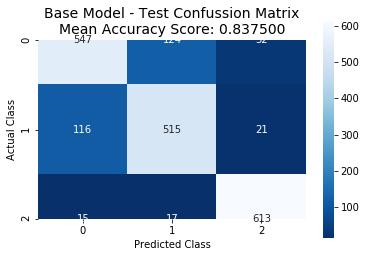

In [37]:
# import library
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

# mean error evaluation using the .score() method
gbrt_score_test = gbrt.score(X_test, y_test)

gbrt_confusion_matrix_test = metrics.confusion_matrix(y_test, y_pred_gbrt_test)

df_cm = pd.DataFrame(gbrt_confusion_matrix_test, range(3), range(3))

sns.heatmap (df_cm, fmt='d',
             cmap='Blues_r', annot=True, square = True)

plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')

gbrt_test_title = 'Base Model - Test Confussion Matrix\nMean Accuracy Score: {0:2f}'.format(gbrt_score_test)
plt.title(gbrt_test_title, size = 14)
plt.show;

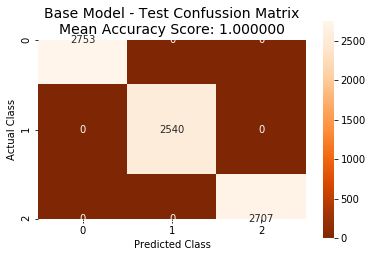

In [38]:
# import library
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics


y_pred_gbrt_train = gbrt.predict(X_train)

# mean error evaluation using the .score() method
gbrt_score_train = gbrt.score(X_train, y_train)

gbrt_confusion_matrix_train = metrics.confusion_matrix(y_train, y_pred_gbrt_train)

df_cm = pd.DataFrame(gbrt_confusion_matrix_train, range(3), range(3))

sns.heatmap (df_cm, fmt='d',
             cmap='Oranges_r', annot=True, square = True)

plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')

gbrt_test_title = 'Base Model - Test Confussion Matrix\nMean Accuracy Score: {0:2f}'.format(gbrt_score_train)
plt.title(gbrt_test_title, size = 14)
plt.show;